### Nauczanie maszynowe z nadzorem

### Opis projektu

Projekt dotyczy nauczania maszynowego do rozróżniania wiadomości niespam od spam.<br>
Wykorzystane w projekcie są dwa algorytmy :

#### 1. Metryka TF-IDF

Wykorzystująca ilość wystąpienia wyrazów w tekscie <br>
https://pl.wikipedia.org/wiki/TFIDF

### Zadania:

<ol> 
    <li> Przygotowanie danych </li>
    <li> Podział dancyh </li>
    <li> Budowanie modelu </li>
    <li> Test dokładnoci </li>
</ol>

In [1]:
# Biblioteki 
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore")




Dane pobrane z https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset?resource=download

In [2]:
# Zaimportowanie do zmienej
import pandas as pd
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<HR>

### 1.Przygotowanie anych

In [3]:
# Zamiana nazw kolumn 
df.rename(columns = {'v1':'class_label', 'v2':'message'}, inplace = True)
# Usunięcie niepotrzebych danych
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
df

,class_label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
# Sprawdzenie ilości wiadomości z podziałem na klasy
df['class_label'].value_counts()


class_label
ham     4825
spam     747
Name: count, dtype: int64

In [5]:
import matplotlib.pyplot as ab
import numpy as np
# Konwersja danych kolumny class na wartości 0 1

labels = ['ham', 'spam']
counts = [4825, 747]
ypos = np.arange(len(labels)) #converting text labels to numberic value, 0 and 1
ypos

array([0, 1])

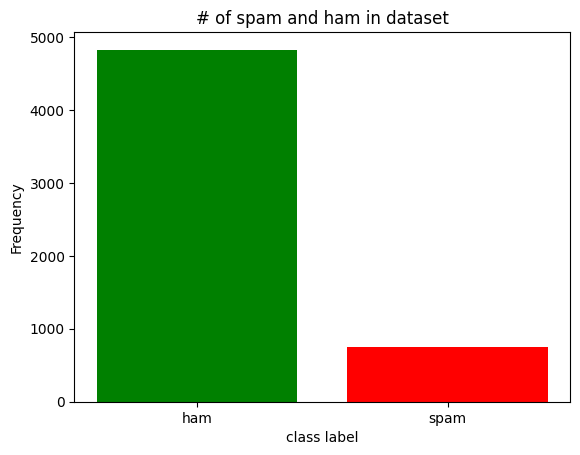

In [6]:
# Pokazanie różnicy na wykresie barowym
ab.xticks(ypos, labels)
ab.xlabel("class label")
ab.ylabel("Frequency")
ab.title("# of spam and ham in dataset")
ab.bar(ypos, counts, color=["g", "r"]);

<HR>

### 2.Podział danych

In [7]:
df['class_label'] = df['class_label'].apply(lambda x: 1 if x == 'spam' else 0)


In [8]:
from sklearn.model_selection import train_test_split
# Przy pomocy Scikitlearn następuje podział dancyh
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['class_label'], test_size = 0.3, random_state = 0)


In [9]:
print('rows in test set: ' + str(x_test.shape))
print('rows in train set: ' + str(x_train.shape))

rows in test set: (1672,)
rows in train set: (3900,)


<HR>

 ### 3.Budowanie modelu Naive Bayes

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

data = x_train.tolist()

vectorizer = TfidfVectorizer(
   lowercase=True,      
   stop_words='english' 
)
features_train_transformed = vectorizer.fit_transform(data)  
features_test_transformed  = vectorizer.transform(x_test) 

In [11]:
# Dane po konwersji za pomocą metryki TF-IDF
df = pd.DataFrame(features_train_transformed.toarray(), columns = vectorizer.get_feature_names_out() )
df.head()
df_columns_name = list(df.columns)

In [12]:
# Sprawdzenie przez Naive Bayes
# https://en.wikipedia.org/wiki/Naive_Bayes_classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(features_train_transformed, y_train)


MultinomialNB()

In [13]:
# Sprawdzenie poprawności modelu do danych testowych
print("Poprawność: {:.2f}%".format(classifier.score(features_test_transformed, y_test) * 100))

Poprawność: 96.41%


### 4.Test dokładności Naive Bayes

In [14]:

labels = classifier.predict(features_test_transformed)
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual = y_test.tolist()
predicted = labels
results = confusion_matrix(actual, predicted)
print('Confusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(actual, predicted))
print ('Report : ')
print (classification_report(actual, predicted) )
score_2 = f1_score(actual, predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

Confusion Matrix :
[[1434    0]
 [  60  178]]
Accuracy Score : 0.9641148325358851
Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1434
           1       1.00      0.75      0.86       238

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.92      1672
weighted avg       0.97      0.96      0.96      1672

F-Measure: 0.856


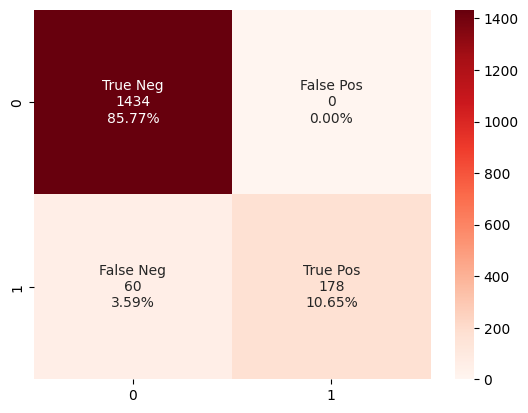

In [15]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                results.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap='Reds');

 ### 3.Budowanie modelu Support vector machine

In [16]:
# Sprawdzenie przez SVC
# https://en.wikipedia.org/wiki/Support_vector_machine
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(features_train_transformed, y_train)

SVC()

In [17]:
print("Poprawność: {:.2f}%".format(classifier.score(features_test_transformed, y_test) * 100))

Poprawność: 97.43%


### 4.Test dokładności Support vector mashine

In [18]:
labels = classifier.predict(features_test_transformed)
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual = y_test.tolist()
predicted = labels
results = confusion_matrix(actual, predicted)
print('Confusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(actual, predicted))
print ('Report : ')
print (classification_report(actual, predicted) )
score_2 = f1_score(actual, predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

Confusion Matrix :
[[1432    2]
 [  41  197]]
Accuracy Score : 0.9742822966507177
Report : 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1434
           1       0.99      0.83      0.90       238

    accuracy                           0.97      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.97      0.97      0.97      1672

F-Measure: 0.902


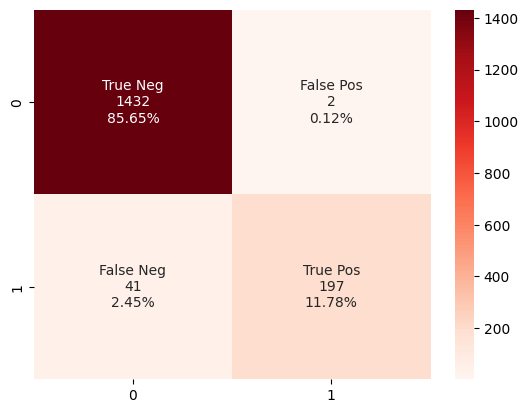

In [19]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                results.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap='Reds');

### 3.Budowanie modelu Drzewo decyzyjne 

In [20]:
from sklearn import tree

treeclf = tree.DecisionTreeClassifier(random_state=0)
treeclf.fit(features_train_transformed, y_train)

DecisionTreeClassifier(random_state=0)

### 4.Test dokładności Drzewa Decyzyjnego

In [25]:
print("Dokładność {:.2f}%".format(classifier.score(features_test_transformed, y_test)*100))

Dokładność 97.43%


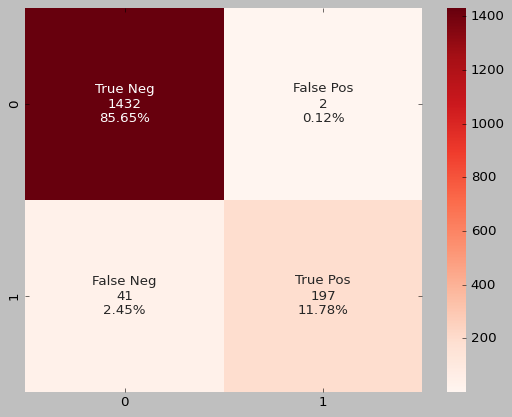

In [26]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                results.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap='Reds');

[Text(0.6640625, 0.9444444444444444, 'txt <= 0.054\ngini = 0.227\nsamples = 3900\nvalue = [3391, 509]'),
 Text(0.484375, 0.8333333333333334, 'claim <= 0.068\ngini = 0.189\nsamples = 3778\nvalue = [3379, 399]'),
 Text(0.453125, 0.7222222222222222, 'mobile <= 0.135\ngini = 0.164\nsamples = 3713\nvalue = [3379, 334]'),
 Text(0.28125, 0.6111111111111112, 'www <= 0.068\ngini = 0.141\nsamples = 3650\nvalue = [3371, 279]'),
 Text(0.25, 0.5, 'free <= 0.05\ngini = 0.122\nsamples = 3607\nvalue = [3371, 236]'),
 Text(0.15625, 0.3888888888888889, '150p <= 0.08\ngini = 0.103\nsamples = 3529\nvalue = [3337, 192]'),
 Text(0.125, 0.2777777777777778, 'service <= 0.079\ngini = 0.094\nsamples = 3511\nvalue = [3337, 174]'),
 Text(0.0625, 0.16666666666666666, 'sae <= 0.105\ngini = 0.086\nsamples = 3493\nvalue = [3335, 158]'),
 Text(0.03125, 0.05555555555555555, '\n  (...)  \n'),
 Text(0.09375, 0.05555555555555555, '\n  (...)  \n'),
 Text(0.1875, 0.16666666666666666, 'ur <= 0.138\ngini = 0.198\nsamples = 18

<Figure size 1000x600 with 0 Axes>

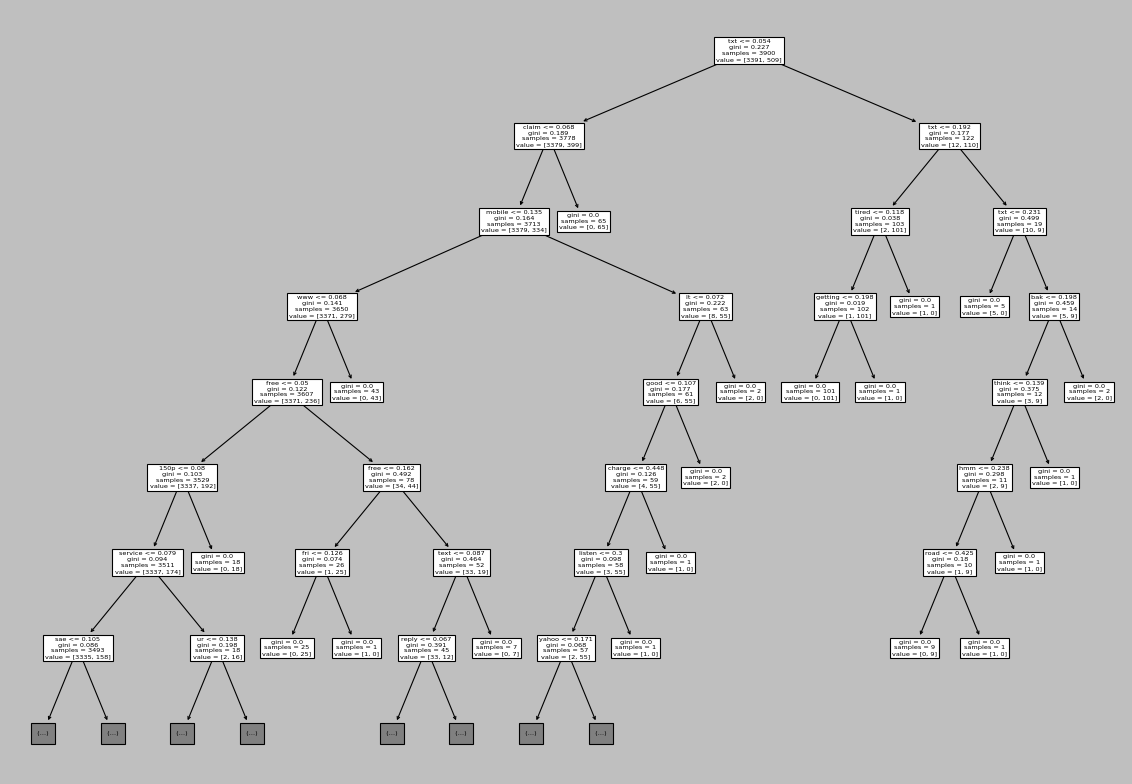

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,6))
plt.style.use("classic")
plt.figure(figsize=(18,12))
tree.plot_tree(treeclf, max_depth=7, feature_names=df_columns_name)

